# Problem Set 3
In this problem set you will get some practice with gradient descent and sub-gradient descent. There is a template for setting up your code and plotting your results at the end of this notebook, which you may find useful. Note that it is only a suggestion -- you are not required to use it.

## Problem 1: Gradient Descent
Consider three quadratics, as given by:
$$
f_i(x) = \frac{1}{2} x^{\top}Q_ix + q_i^{\top} x + c_i,
$$
for the three triples $(Q_i,q_i,c_i)$, $i=1,2,3$ given below.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Q1 = np.array([[ 1.17091573, -0.03686123, -0.1001259 ],
       [-0.03686123,  1.03835691,  0.17285956],
       [-0.1001259 ,  0.17285956,  1.06072736]])
Q2 = np.array([[ 15.27095759,  -1.97915834, -14.22190153],
       [ -1.97915834,   0.34660759,   1.91586927],
       [-14.22190153,   1.91586927,  15.76943482]])
Q3 = np.array([[28.59657006,  0.3684004 ,  0.90750259],
       [ 0.3684004 , 28.11480924,  0.81866989],
       [ 0.90750259,  0.81866989, 28.7886207 ]])
q1 = np.array([-4.68686663, -0.89027884, -1.57340281])
q2 = np.array([ 6.75973216,  1.23223936, -0.87956749])
q3 = np.array([ 0.8684369 , -4.69970837, -1.09690726])
c1 = 1.61888566;
c2 = -2.66426693;
c3 = 0.84184738;





### Part (A)
Implement gradient descent with a step-size of $0.1$ for all three quadratics, and plot function value versus iteration number. Explain what you see.

Eigenvalues Q1 [1.3  1.1  0.87]
Eigenvalues Q2 [30.     1.3    0.087]
Eigenvalues Q3 [30.  28.  27.5]


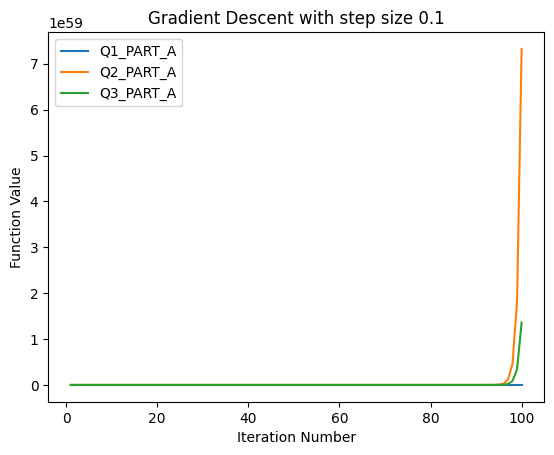

In [ ]:


eigenvalues_Q1 = np.linalg.eigvals(Q1)
eigenvalues_Q2 = np.linalg.eigvals(Q2)
eigenvalues_Q3 = np.linalg.eigvals(Q3)

print ("Eigenvalues Q1", eigenvalues_Q1)
print ("Eigenvalues Q2", eigenvalues_Q2)
print ("Eigenvalues Q3", eigenvalues_Q3)

# Part A - gradient descent
def gradient_descent(Q, q, c, step_size, number_of_interactions):
    # initialize x to zeros - same effect as np.zeros(3) as the vector has 3 elements - initial guess
    x = np.zeros_like(q)

    #need to store the values for plotting
    function_values = []

    # Iterate for a fixed number of iterations
    for _ in range(number_of_interactions):
        # Update x using the gradient and step size

        #calculates the gradient of a quadratic function (square matrix with the 2nd order derivative) - @ is the matrix multiplication operator (it multiplies Q with the v)
        gradient = Q @ x + q
        x = x - step_size * gradient

        # Store the function value at each iteration
        function_values.append(quadratic_function(x, Q, q, c))

    return function_values

# method definition
def quadratic_function(x, Q, q, c):
    # quadritic form calc (x.T @ Q @ x -- )
    return 0.5 * x.T @ Q @ x + q.T @ x + c


# step size
step_size = 0.1

# number of interactions
number_of_interactions = 100;

# Gradient Descent for Quadratic 1
function_values_q1 = gradient_descent(Q1, q1, c1, step_size, number_of_interactions)

# Gradient Descent for Quadratic 2
function_values_q2 = gradient_descent(Q2, q2, c2, step_size, number_of_interactions)

# Gradient Descent for Quadratic 3
function_values_q3 = gradient_descent(Q3, q3, c3, step_size, number_of_interactions)

# Plotting
plt.figure()
plt.plot(range(1, number_of_interactions + 1), function_values_q1, label='Q1_PART_A')
plt.plot(range(1, number_of_interactions + 1), function_values_q2, label='Q2_PART_A')
plt.plot(range(1, number_of_interactions + 1), function_values_q3, label='Q3_PART_A')
plt.xlabel('Iteration Number')
plt.ylabel('Function Value')
plt.title('Gradient Descent with step size ' + str(step_size))
plt.legend()
plt.show()

### Part (B)
Find a step-size for each quadratic (it can be different for each), and implement gradient descent with this stepsize. Plot function value versus iteration number. Try to pick a step size that gives you fast convergence. How did you pick it?

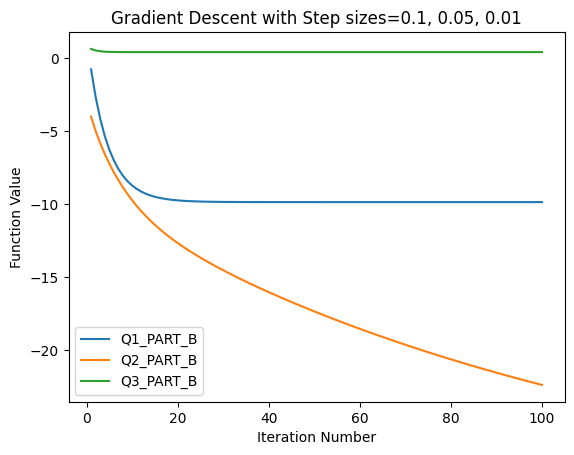

In [ ]:

##########################################################################################
## Part B
## Will reduce the step size of B and C function values were increasing/diverging instead
## of descreasing - indication of a step too large.
##########################################################################################

#new step values - will keep step size for the first one and decrease the last two

#experiment with step sizes
step_sizes = [0.1, 0.05, 0.01]
#plt.figure()
#for step_size in step_sizes:
#    function_values = gradient_descent(Q1, q1, c1, step_size, number_of_interactions)
#    plt.plot(function_values, label=f'Step Size: {step_size}')

#plt.figure()
#for step_size in step_sizes:
#    function_values = gradient_descent(Q2, q2, c2, step_size, number_of_interactions)
#    plt.plot(function_values, label=f'Step Size: {step_size}')

#plt.figure()
#for step_size in step_sizes:
#    function_values = gradient_descent(Q3, q3, c3, step_size, number_of_interactions)
#    plt.plot(function_values, label=f'Step Size: {step_size}')


step_size_1 = 0.1
step_size_2 = 0.05
step_size_3 = 0.01
#call them again
function_values_q1_part_B = gradient_descent(Q1, q1, c1, step_size_1, number_of_interactions)

# Gradient Descent for Quadratic 2
function_values_q2_part_B = gradient_descent(Q2, q2, c2, step_size_2, number_of_interactions)

# Gradient Descent for Quadratic 3
function_values_q3_part_B = gradient_descent(Q3, q3, c3, step_size_3, number_of_interactions)

plt.figure()
plt.plot(range(1, number_of_interactions + 1), function_values_q1_part_B, label='Q1_PART_B')
plt.plot(range(1, number_of_interactions + 1), function_values_q2_part_B, label='Q2_PART_B')
plt.plot(range(1, number_of_interactions + 1), function_values_q3_part_B, label='Q3_PART_B')
plt.xlabel('Iteration Number')
plt.ylabel('Function Value')
plt.title('Gradient Descent with Step sizes=' + str(step_size_1) + ', ' + str(step_size_2) + ', ' + str(step_size_3))
plt.legend()
plt.show()

### Part (C)
Even with your carefully tuned choice of step size, you will see that the rates of convergence are not the same, Explain why this is the case.

In [ ]:
##########################################################################################
## Part C
## Eigenvalues Q1 [1.3  1.1  0.87]
## Eigenvalues Q2 [30.     1.3    0.087]
## Eigenvalues Q3 [30.  28.  27.5]
##
## Eigenvalues are significantly different in magnitude which can lead to variation in
## convergence rates. The large the e-values, the quicker the convergence (generally)
##
##########################################################################################


### Part (D) -- Optional --
Read about back tracking line search (BTLS) and implement it here.

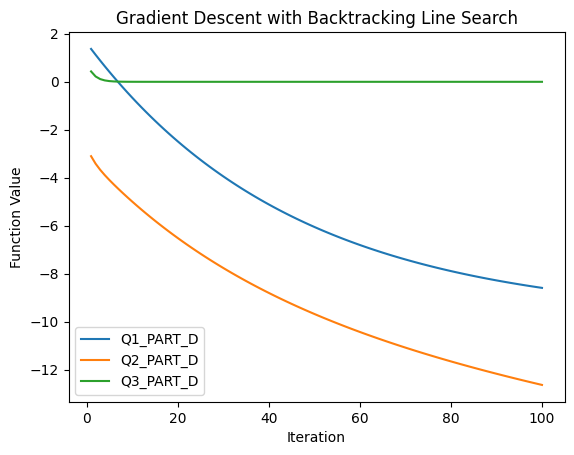

In [ ]:
##########################################################################################
## Part D
## Backtracking line search - optmization technique to determine the appropriate step size during
## each interation of GD
## alfa and beta will be the parameter to control the rate of decrease in the stepsize
##
##########################################################################################
def gradient_descent_btls(Q, q, c, number_of_interactions, alpha=0.5, beta=0.5):
    #same logic as previous example
    x = np.zeros_like(q)
    function_values = []

    for _ in range(number_of_interactions):
        gradient = Q @ x + q

        # Backtracking line search
        step_size = 0.01  # step size - initial
        while quadratic_function(x - step_size * gradient, Q, q, c) > quadratic_function(x, Q, q, c) - alpha * step_size * np.linalg.norm(gradient)**2:
            step_size *= beta

        x = x - step_size * gradient  # Update step
        function_value = quadratic_function(x, Q, q, c)
        function_values.append(function_value)

    return function_values

function_values_btls_q1 = gradient_descent_btls(Q1, q1, c1, number_of_interactions)
function_values_btls_q2 = gradient_descent_btls(Q2, q2, c2, number_of_interactions)
function_values_btls_q3 = gradient_descent_btls(Q3, q2, c3, number_of_interactions)

# Plot the results
plt.figure()
plt.plot(range(1, number_of_interactions + 1), function_values_btls_q1, label='Q1_PART_D')
plt.plot(range(1, number_of_interactions + 1), function_values_btls_q2, label='Q2_PART_D')
plt.plot(range(1, number_of_interactions + 1), function_values_btls_q3, label='Q3_PART_D')
plt.title('Gradient Descent with Backtracking Line Search')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.legend()
plt.show()



## Problem 2: Sub-gradient Method
Consider a least squares problem with $\ell^1$ regularization:
$$
\min_x \left[f(x) = \frac{1}{2}\|{Ax-b}\|_2^2 + \lambda \|{x}\|_1 \right]
$$

This problem is often called LASSO (least absolute shrinkage and selection operator) and is known to induce {\em sparse} solutions with few nonzero elements in $x$, which can have advantages in terms of computation and interpretability. This problem is nonsmooth due to the regularization term. It is also not strongly convex when $A$ has more columns than rows. We (i.e., you) will solve this problem using several different algorithms in this class. We start with what we have seen thus far: the subgradient method.

The dataset represented in the matrices provided in the numpy binary files A.npy and b.npy are from a diabetes dataset (scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) with 10 features that has been corrupted with an additional 90 noisy features. Thus a sparse solution should be very effective. Below you will find some skeleton code to help with loading the data, running the algorithm and plotting the results. Don't use stock optimization code, you should develop the core part of this assignment yourself.

Minimize $f(x)$ using $10^4$ iterations of the subgradient method starting with $t=0$ and $x_0 =0$.

### Part (A)
Use a decreasing step size of $\eta_t = c/t$ with values for $c$ that (roughly) optimize the empirical performance. Separately record the (unsquared) error $\|Ax_t-b\|$ and the regularization term $\|x\|_1$.

### Part (B)
Now use a more slowly decreasing step size of $\eta_t = c/\sqrt{t+1}$ with values for $c$ that (roughly) optimize the empirical performance. Separately record the (unsquared) error $\|Ax_t-b\|$ and the regularization term $\|x\|_1$.

### Part (C)
Now try to find the best fixed step size. Plot the results and compare to the decreasing step size you see above.

### Part (D) -- Optional --
If you did the BTLS optional part above, either implement BTLS for subgradient method, or explain why the challenges are with this.


Here is a template that may be useful. Note that it is designed for the LASSO problem, so you will have to modify it to use it for the quadratic problems at the beginning, but the ideas are the same.

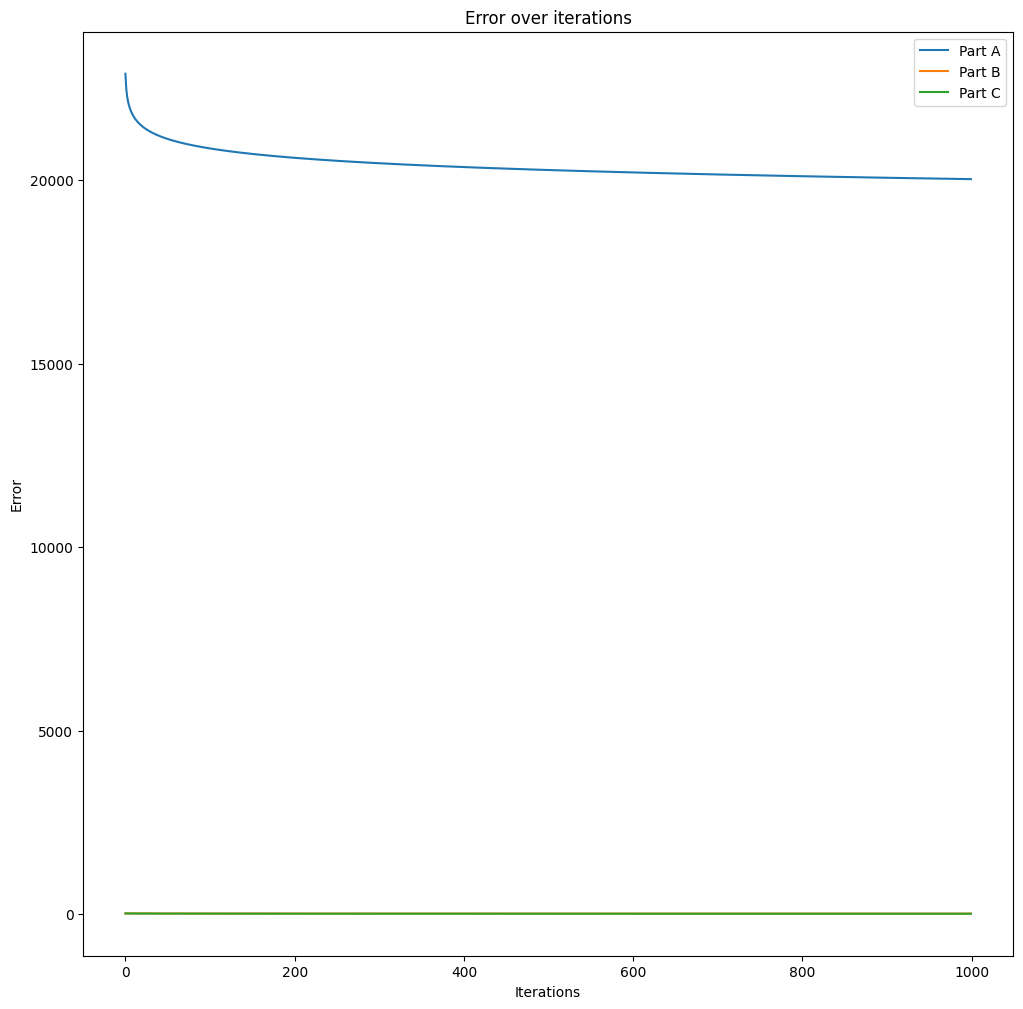

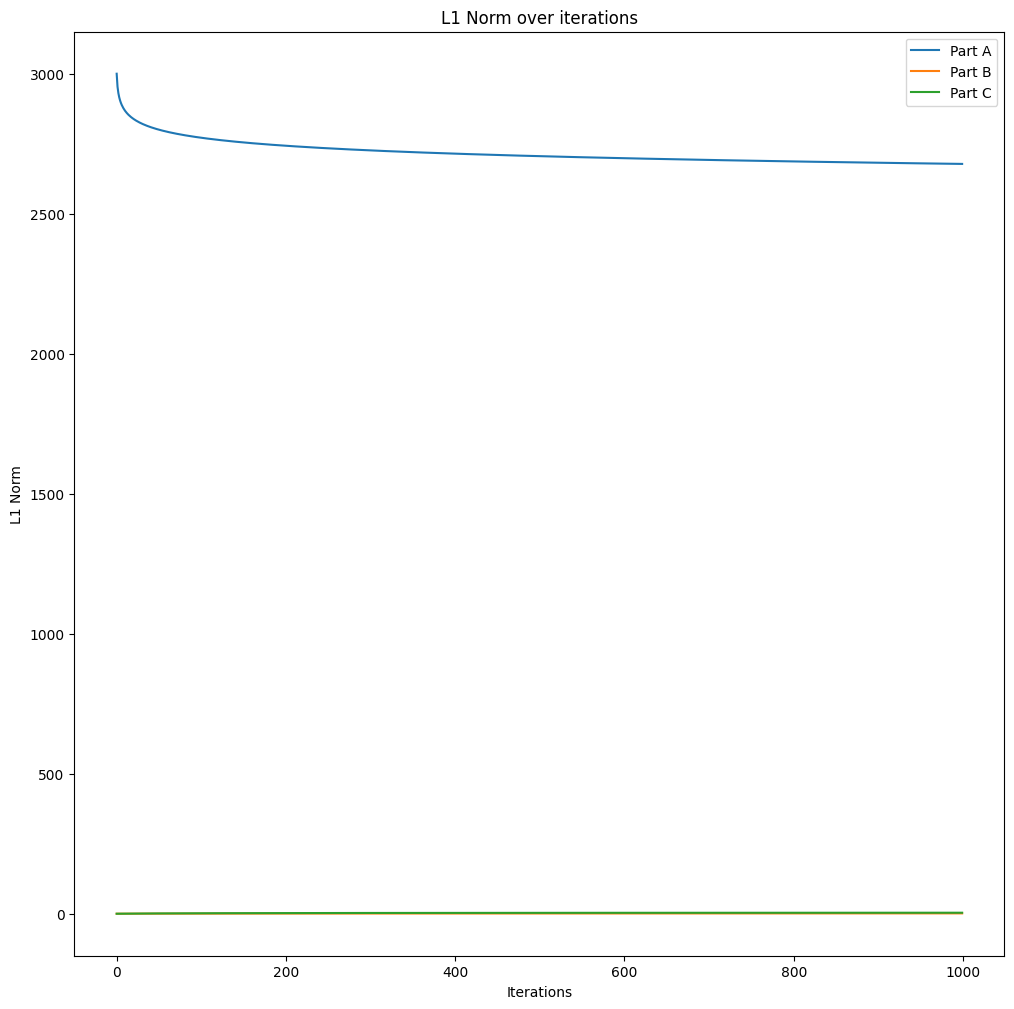

In [ ]:
from __future__ import division
import numpy as np
import numpy.random as rn
import numpy.linalg as la
import matplotlib.pyplot as plt


def subgradient(x, A, b, t, lam, c, part):
    # x is the vector of coefficients, A is the matrix of predictors, b is the outcome vector, lam is the scalar lambda
    #the gradient is A(transpose)x(Ax−b)
    gradient_least_squares = np.dot(A.T, np.dot(A, x) - b)

    #the subgradient of ∣xi​∣ at a point xi is 1 if xi> 0, -1 if xi < 0 or any value in between 0 and 1 if x=0
    #np.sign(x) computes the subgradient for each element
    subgradient_l1 = np.sign(x)
    gradient = gradient_least_squares + lam * subgradient_l1 #multiplication to encourge sparsity as values will be zero or close to it

    ## Part A - decreasing step size
    if part == 'part_A':
        #Use a decreasing step size of  ηt=c/t  with values for  c  that (roughly) optimize the empirical performance.
        #add a check for t > 0 to prevent division by zero
        step_size = c / t if t > 0 else 1
    elif part == 'part_B':
        ##Part B
        #Now use a more slowly decreasing step size of  ηt=c/t+1−−−−√  with values for  c  that (roughly) optimize the empirical performance.
        step_size =  c / np.sqrt(t + 1)
    else:
        ##Part C
        #Now try to find the best fixed step size
        step_size = 1e-5

    return x - step_size * gradient

def descent(update, A, b, reg, c, part, T=int(1e4)):
    x = np.zeros(A.shape[1])
    error = []
    l1 = []
    for t in range(T):
        x = update(x, A, b, t, reg, c, part)

        # record error and l1 norm
        if (t % 1 == 0) or (t == T - 1):
            error.append(la.norm(np.dot(A, x) - b))
            l1.append(np.sum(abs(x)))

            assert not np.isnan(error[-1])

    return x, error, l1


def main(T=int(1e3)):
    # Set a seed for reproducibility
    #np.random.seed(0)

    A = np.load("A.npy")
    b = np.load("b.npy")

    # modify regularization parameters below
    reg = 0.01

    ##Part A - decreasing step size
    c_a = 1e-5
    x_a, error_a, l1_a = descent(subgradient, A, b, reg, c_a, 'part_A', T=T)

    ##Part B - slowly descreasing
    c_b = 1e-5
    x_b, error_b, l1_b = descent(subgradient, A, b, reg, c_b, 'part_B', T=T)

    ##Part C - fixed step size
    c_c = 1e-5
    x_c, error_c, l1_c = descent(subgradient, A, b, reg, c_c, 'part_C', T=T)

    plt.figure(figsize=(12,12))
    plt.plot(error_a, label='Part A')
    plt.plot(error_b, label='Part B')
    plt.plot(error_c, label='Part C')
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title('Error over iterations')
    plt.legend()
    #saving as png to prevent the error from occuring: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque
    plt.savefig('error.png')

    plt.figure(figsize=(12,12))
    plt.plot(l1_a, label='Part A')
    plt.plot(l1_b, label='Part B')
    plt.plot(l1_c, label='Part C')
    plt.xlabel('Iterations')
    plt.ylabel('L1 Norm')
    plt.title('L1 Norm over iterations')
    plt.legend()
    #saving as png to prevent the error from occuring: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque
    plt.savefig('l1norm.png')


##### Part D #####
## Unable to have a good implementation.. direction not descent at this point.. which is a must for BTLS. Also the function is not smooth, it would add complexity
## and I actually have no idea how to do it in an efficient way :)


if __name__ == "__main__":
    main()